In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
base_dir = '/content/drive/My Drive/dataset'
!ls "/content/drive/My Drive/dataset"

bahan  latih  validasi


In [ ]:
#Menentukan Direktori
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

In [ ]:
#Menentukan direktori isi bahan
empatTahun_dir = os.path.join(bahan_dir, 'empatTahun/')
duaTahun_dir = os.path.join(bahan_dir, 'duaTahun/')

print("Jumlah Data Train Tiap Kelas")
print('Jumlah Gambar Umur 4 Tahun : ', len(os.listdir(empatTahun_dir)))
print('Jumlah Gambar Umur 2 Tahun: ', len(os.listdir(duaTahun_dir)))

Jumlah Data Train Tiap Kelas
Jumlah Gambar Umur 4 Tahun :  40
Jumlah Gambar Umur 2 Tahun:  40


In [ ]:
#Direktori isi latih/training
train_empatTahun = os.path.join(train_dir, 'empatTahun/')
train_duaTahun = os.path.join(train_dir, 'duaTahun/')

#Direktori isi validasi
validation_empatTahun = os.path.join(validation_dir, 'empatTahun/')
validation_duaTahun = os.path.join(validation_dir, 'duaTahun/')

In [ ]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
      i_file = source + i
      destination = train + i
      copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

#jumlah pembagian data training dan testing
train_ratio = 0.8

#pembagian training dan validasi
#training
source_00 = empatTahun_dir
train_00 = train_empatTahun
val_00 = validation_empatTahun
train_val_split(source_00, train_00, val_00, train_ratio)


#validasi
source_01 = duaTahun_dir
train_01 = train_duaTahun
val_01 = validation_duaTahun
train_val_split(source_01, train_01, val_01, train_ratio)


In [ ]:
print('Jumlah all empatTahun :', len(os.listdir(empatTahun_dir)))
print('Jumlah train empatTahun :', len(os.listdir(train_empatTahun)))
print('Jumlah Val empatTahun : ', len(os.listdir(validation_empatTahun)))

Jumlah all empatTahun : 40
Jumlah train empatTahun : 32
Jumlah Val empatTahun :  8


In [ ]:
print('Jumlah all duaTahun :', len(os.listdir(duaTahun_dir)))
print('Jumlah train duaTahun :', len(os.listdir(train_duaTahun)))
print('Jumlah Val duaTahun : ', len(os.listdir(validation_duaTahun)))

Jumlah all duaTahun : 40
Jumlah train duaTahun : 32
Jumlah Val duaTahun :  8


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 64 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.96):
      print('\nAkurasi mencapai 96%')
      self.model.stop_training = True

callbacks=myCallback()

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(200, activation='relu'),
                                    tf.keras.layers.Dropout(0.3, seed=112),
                                    tf.keras.layers.Dense(500, activation='relu'),
                                    tf.keras.layers.Dropout(0.5, seed=112),
                                    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
model.compile(loss = 'binary_crossentropy',
               optimizer = 'Adam',
               metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 3, # 1312 images = batch_size * steps
    epochs = 50,
    validation_data = val_generator,
    validation_steps = 2,
    verbose = 1,
    callbacks=[callbacks]
)
#3....5
#3....6

Epoch 1/50
3/3 [==============================] - 3s 1s/step - loss: 0.7479 - accuracy: 0.5000 - val_loss: 0.6883 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 2s 754ms/step - loss: 0.6800 - accuracy: 0.5333 - val_loss: 0.6868 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 2s 856ms/step - loss: 0.7293 - accuracy: 0.3667 - val_loss: 0.6783 - val_accuracy: 0.5625
Epoch 4/50
3/3 [==============================] - 2s 690ms/step - loss: 0.6790 - accuracy: 0.6250 - val_loss: 0.6698 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 2s 671ms/step - loss: 0.6571 - accuracy: 0.7083 - val_loss: 0.6452 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 2s 784ms/step - loss: 0.6154 - accuracy: 0.5333 - val_loss: 0.5997 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 2s 834ms/step - loss: 0.5715 - accuracy: 0.6000 - val_loss: 0.5286 - val_accuracy: 1.0000
Epoch 8/50
3/3 [=======

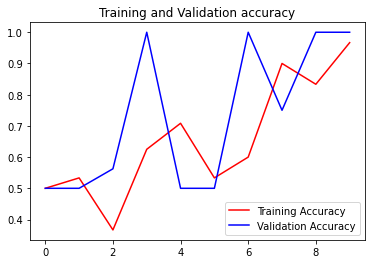

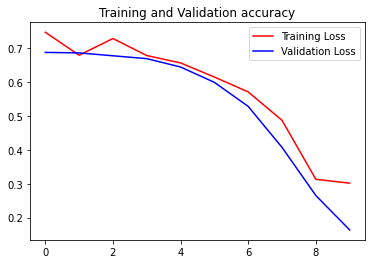

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,'r',label = 'Training Accuracy')
plt.plot(epochs, val_acc,'b',label= 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss,'r',label = 'Training Loss')
plt.plot(epochs, val_loss,'b',label= 'Validation Loss')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files


Saving 2tahun.jpg to 2tahun (1).jpg
2tahun.jpg

umur2Tahun

Suplemen Leopard


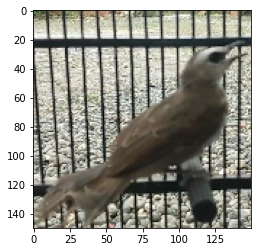

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('\numur2Tahun')
    print('\nSuplemen Leopard')
  elif classes[0,1]!=0:
    print('umur4Tahun')
    print('\nSuplemen GoldCoin')